Epoch [1/30], Step [100/938], Loss: 0.1069
Epoch [1/30], Step [200/938], Loss: 0.0805
Epoch [1/30], Step [300/938], Loss: 0.0472
Epoch [1/30], Step [400/938], Loss: 0.1272
Epoch [1/30], Step [500/938], Loss: 0.1039
Epoch [1/30], Step [600/938], Loss: 0.0257
Epoch [1/30], Step [700/938], Loss: 0.1192
Epoch [1/30], Step [800/938], Loss: 0.0252
Epoch [1/30], Step [900/938], Loss: 0.0352
Train Accuracy: 96.38%
Test Accuracy: 98.02%
Test Loss: 0.0637
Epoch [2/30], Step [100/938], Loss: 0.0058
Epoch [2/30], Step [200/938], Loss: 0.0557
Epoch [2/30], Step [300/938], Loss: 0.0464
Epoch [2/30], Step [400/938], Loss: 0.0299
Epoch [2/30], Step [500/938], Loss: 0.0074
Epoch [2/30], Step [600/938], Loss: 0.0388
Epoch [2/30], Step [700/938], Loss: 0.0319
Epoch [2/30], Step [800/938], Loss: 0.0323
Epoch [2/30], Step [900/938], Loss: 0.0321
Train Accuracy: 98.60%
Test Accuracy: 98.43%
Test Loss: 0.0510
Epoch [3/30], Step [100/938], Loss: 0.0347
Epoch [3/30], Step [200/938], Loss: 0.0060
Epoch [3/30], 

Epoch [19/30], Step [200/938], Loss: 0.0005
Epoch [19/30], Step [300/938], Loss: 0.0000
Epoch [19/30], Step [400/938], Loss: 0.0516
Epoch [19/30], Step [500/938], Loss: 0.0003
Epoch [19/30], Step [600/938], Loss: 0.0004
Epoch [19/30], Step [700/938], Loss: 0.0013
Epoch [19/30], Step [800/938], Loss: 0.0011
Epoch [19/30], Step [900/938], Loss: 0.0007
Train Accuracy: 99.84%
Test Accuracy: 98.89%
Test Loss: 0.0610
Epoch [20/30], Step [100/938], Loss: 0.0635
Epoch [20/30], Step [200/938], Loss: 0.0000
Epoch [20/30], Step [300/938], Loss: 0.0000
Epoch [20/30], Step [400/938], Loss: 0.0000
Epoch [20/30], Step [500/938], Loss: 0.0001
Epoch [20/30], Step [600/938], Loss: 0.0016
Epoch [20/30], Step [700/938], Loss: 0.0027
Epoch [20/30], Step [800/938], Loss: 0.0005
Epoch [20/30], Step [900/938], Loss: 0.0130
Train Accuracy: 99.83%
Test Accuracy: 98.90%
Test Loss: 0.0616
Epoch [21/30], Step [100/938], Loss: 0.0056
Epoch [21/30], Step [200/938], Loss: 0.0000
Epoch [21/30], Step [300/938], Loss: 0

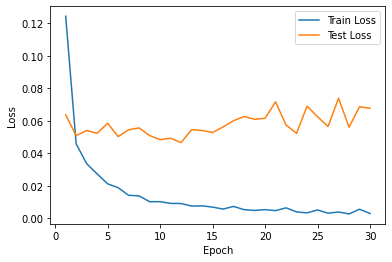

Confusion Matrix:
[[ 963    1    2    0    1    1    4    5    2    1]
 [   0 1129    1    1    3    0    0    0    1    0]
 [   1    0 1019    0    0    0    1   10    1    0]
 [   0    0    2 1006    0    1    0    1    0    0]
 [   0    0    0    1  980    0    0    0    0    1]
 [   0    0    1    4    0  884    2    1    0    0]
 [   1    3    0    0    3    2  948    0    1    0]
 [   0    4    6    1    0    0    0 1015    2    0]
 [   0    1    1    2    2    0    0    0  966    2]
 [   0    0    0    1   12    0    0    2    4  990]]


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from models.models import CNN, CNN_d, CNN_deep



# Set random seed for reproducibility
torch.manual_seed(42)

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)



# Define data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the Deep CNN architecture
class CNN_deep(nn.Module):
    def __init__(self):
        super(CNN_deep, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



#  Create an instance of the CNN
model = CNN_deep().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store the train and test losses for each epoch
train_losses = []
test_losses = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    print(f'Train Accuracy: {(100 * correct / total):.2f}%')

    # Evaluation on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Print test accuracy at the end of each epoch
    test_accuracy = (100 * correct / total)
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    print(f'Test Loss: {test_loss:.4f}')

# Plot the train and test losses for each epoch
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate and display the confusion matrix
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)